# Morpion Solitaire Command-Line Interface (CLI)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

This gives an example of usage of the Morpion Solitaire command line interface:

In [2]:
!dotnet run --project MorpionSolitaireCLI


Usage example:
  MorpionSolitaireCLI.exe -n <number of games to run>
  dotnet run --project MorpionSolitaireCLI -- -n <number of games to run>

Optional flags

    --timing      : show the running time
    --progress    : display a progress bar

    --path <path>    : directory in which data is saved
    --maxHistogram   : save histogram with score occurence
    --sequence       : save a sequence of scores

    --revertMode <mode>     : 'Restart' (default), 'RandomNode', 'DiscardedBranch', 'NextBranch'
    --weightPower <int>     : use a weighted probability with satisfying
    --weightOffset <double>     [function(score) = score^power + offset]



## Basic exploration

Command to run 1,000,000 games (ca. 15 minutes run time):

```dotnet run --project MorpionSolitaireCLI -- -n 1000000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\basic" --maxHistogram```

In [3]:
basic_histogram = pd.read_csv("data/basic/maxHistogram.csv", names=["Score", "Count"])
basic_histogram["Count"].sum()

1000000

In [4]:
basic_histogram["Frequency"] = basic_histogram["Count"] / basic_histogram["Count"].sum()

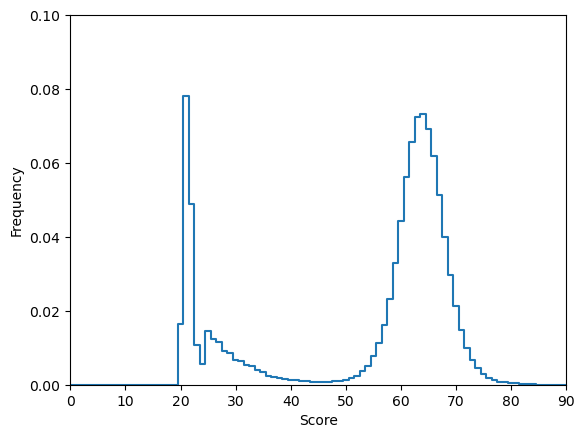

In [5]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

In [6]:
basic_sequence = pd.read_csv("data/basic/sequence.csv", names=["Start", "Score"])

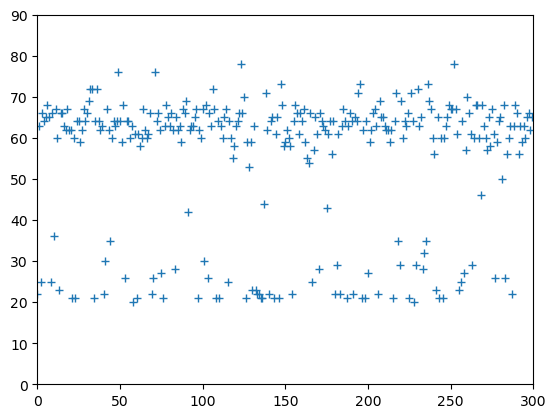

In [14]:
plt.plot(basic_sequence["Score"], linestyle="", marker="+")
plt.xlim(0, 300)
plt.ylim(0, 90)
plt.show()

## Revert to random node

Command to run 100,000 games (ca. 1 minute run time):

```dotnet run --project MorpionSolitaireCLI -- -n 100000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\discarded" --maxHistogram --revertMode RandomNode```

In [6]:
randomNode_histogram = pd.read_csv("data/randomNode/maxHistogram.csv", names=["Score", "Count"])
randomNode_histogram["Count"].sum()

100000

In [7]:
randomNode_histogram["Frequency"] = randomNode_histogram["Count"] / randomNode_histogram["Count"].sum()

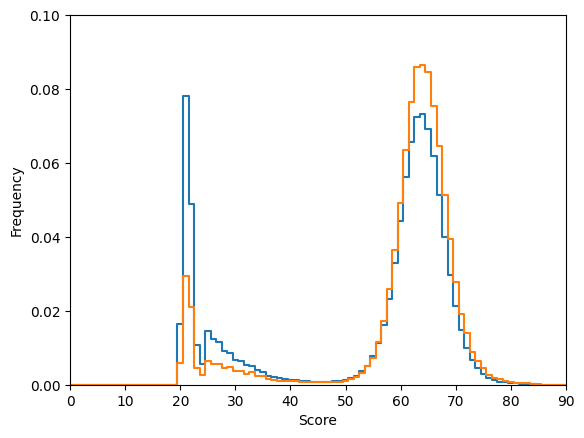

In [15]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(randomNode_histogram["Score"], randomNode_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

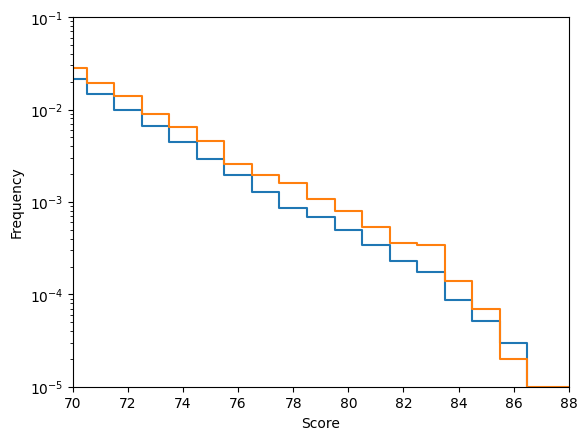

In [18]:
xmin, xmax = 70, 88
basic_histogram_tail = basic_histogram[xmin:xmax+1]
randomNode_histogram_tail = randomNode_histogram[xmin:xmax+1]
plt.step(basic_histogram_tail["Score"], basic_histogram_tail["Frequency"], where='mid')
plt.step(randomNode_histogram_tail["Score"], randomNode_histogram_tail["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(xmin, xmax)
plt.ylim(0.00001, 0.1)
plt.yscale('log')
plt.show()

## Revert to random node with linear weight

The offset is chosen so that there is a 1 in 10,000 chance that the game starts anew when the score is 100.

For an offset $a$, the weight at stage $n$ is:
$$w_n = a + n$$
so the sum of all weights for a game of score $N$ is
$$W_N = \sum_{n = 0}^N w_n = (N+1) a + \frac{N (N+1)}{2}$$
So if we want the probability to restart anew to be $p$, we must have
$$\frac{w_0}{W_N} = p$$
thus
$$a = \frac{N (N+1)}{2 (1/p - N - 1)}.$$
If $1/p$ is very large, and $N$ is also larger than one, we have
$$a \approx \frac{N^2 p}{2}$$

With $1/p = 10,000$ and $N = 100$, this is $a \approx 0.5$.

Command to run 100,000 games (ca. 1 minute run time):

```dotnet run --project MorpionSolitaireCLI -- -n 100000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\randomNodeLinearWeight" --maxHistogram --revertMode RandomNode --weightPower 1 --weightOffset 0.5```

In [9]:
randomNodeLinearWeight_histogram = pd.read_csv("data/randomNodeLinearWeight/maxHistogram.csv", names=["Score", "Count"])
randomNodeLinearWeight_histogram["Count"].sum()

100000

In [10]:
randomNodeLinearWeight_histogram["Frequency"] = randomNodeLinearWeight_histogram["Count"] / randomNodeLinearWeight_histogram["Count"].sum()

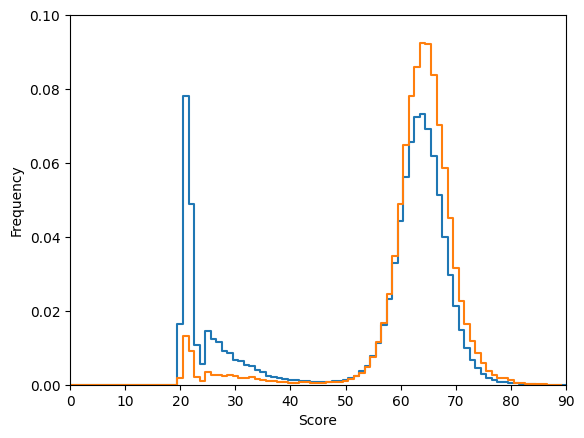

In [19]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(randomNodeLinearWeight_histogram["Score"], randomNodeLinearWeight_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

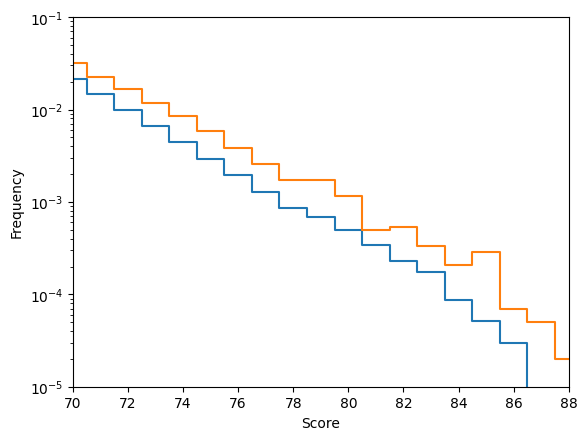

In [21]:
xmin, xmax = 70, 88
basic_histogram_tail = basic_histogram[xmin:xmax+1]
randomNodeLinearWeight_histogram_tail = randomNodeLinearWeight_histogram[xmin:xmax+1]
plt.step(basic_histogram_tail["Score"], basic_histogram_tail["Frequency"], where='mid')
plt.step(randomNodeLinearWeight_histogram_tail["Score"], randomNodeLinearWeight_histogram_tail["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(xmin, xmax)
plt.ylim(0.00001, 0.1)
plt.yscale('log')
plt.show()

## Revert to random node with square weight

The offset is chosen so that there is a 1 in 10,000 chance that the game starts anew when the score is 100.

For an offset $a$, the weight at stage $n$ is:
$$w_n = a + n^2$$
so the sum of all weights for a game of score $N$ is
$$W_N = \sum_{n = 0}^N w_n = (N+1) a + \frac{N (N+1) (2N+1)}{6}$$
So if we want the probability to restart anew to be $p$, we must have
$$\frac{w_0}{W_N} = p$$
thus
$$a = \frac{N (N+1) (2N+1)}{6 (1/p - N - 1)}.$$
If $1/p$ is very large, and $N$ is also larger than one, we have
$$a \approx \frac{N^3 p}{3}$$

With $1/p = 10,000$ and $N = 100$, this is $a \approx 33$.

Command to run 1,000,000 games (ca. 9 minutes run time):

```dotnet run --project MorpionSolitaireCLI -- -n 1000000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\randomNodeSquareWeight" --maxHistogram --revertMode RandomNode --weightPower 2 --weightOffset 33```

In [48]:
randomNodeSquareWeight_histogram = pd.read_csv("data/randomNodeSquareWeight/maxHistogram.csv", names=["Score", "Count"])
randomNodeSquareWeight_histogram["Count"].sum()

1000000

In [49]:
randomNodeSquareWeight_histogram

,Score,Count
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
92,92,1
93,93,0
94,94,2
95,95,0


In [50]:
randomNodeSquareWeight_histogram["Frequency"] = randomNodeSquareWeight_histogram["Count"] / randomNodeSquareWeight_histogram["Count"].sum()

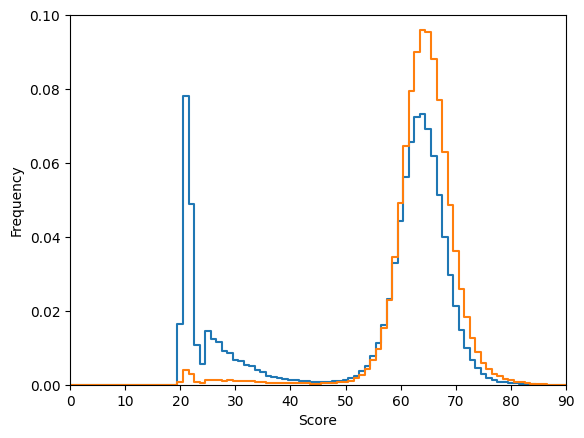

In [51]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(randomNodeSquareWeight_histogram["Score"], randomNodeSquareWeight_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

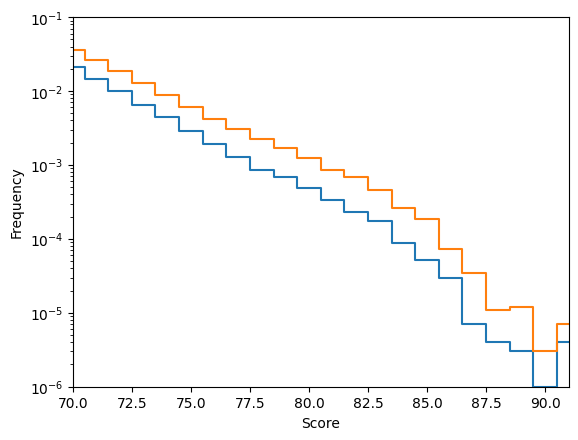

In [58]:
xmin, xmax = 70, 91
basic_histogram_tail = basic_histogram[xmin:xmax+1]
randomNodeSquareWeight_histogram_tail = randomNodeSquareWeight_histogram[xmin:xmax+1]
plt.step(basic_histogram_tail["Score"], basic_histogram_tail["Frequency"], where='mid')
plt.step(randomNodeSquareWeight_histogram_tail["Score"], randomNodeSquareWeight_histogram_tail["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(xmin, xmax)
plt.ylim(0.000001, 0.1)
plt.yscale('log')
plt.show()

## Revert to discarded branches

Command to run 100,000 games (ca. 1 minute run time):

```dotnet run --project MorpionSolitaireCLI -- -n 100000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\discarded" --maxHistogram --revertMode DiscardedBranch```

In [28]:
discarded_histogram = pd.read_csv("data/discarded/maxHistogram.csv", names=["Score", "Count"])
discarded_histogram["Count"].sum()

100000

In [29]:
discarded_histogram["Frequency"] = discarded_histogram["Count"] / discarded_histogram["Count"].sum()

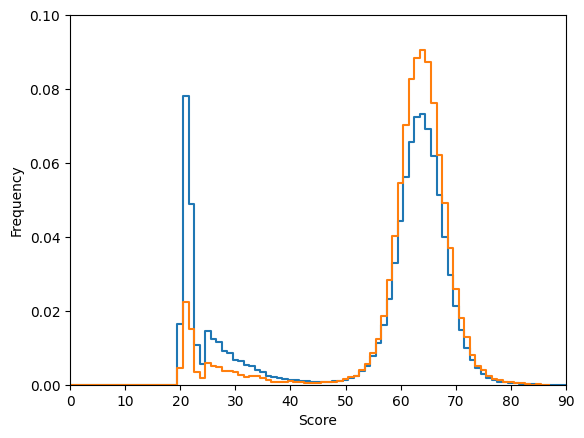

In [32]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(discarded_histogram["Score"], discarded_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

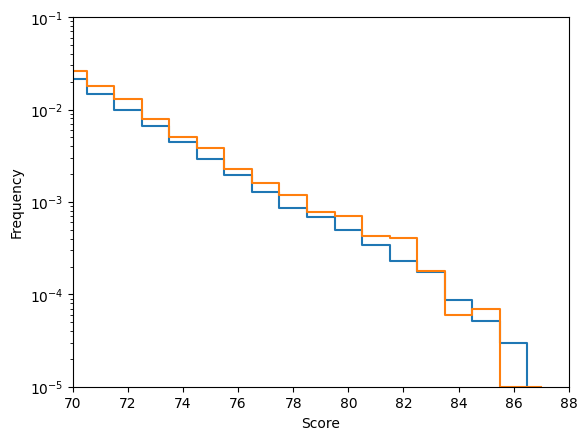

In [33]:
xmin, xmax = 70, 88
basic_histogram_tail = basic_histogram[xmin:xmax+1]
discarded_histogram_tail = discarded_histogram[xmin:xmax+1]
plt.step(basic_histogram_tail["Score"], basic_histogram_tail["Frequency"], where='mid')
plt.step(discarded_histogram_tail["Score"], discarded_histogram_tail["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(xmin, xmax)
plt.ylim(0.00001, 0.1)
plt.yscale('log')
plt.show()

In [15]:
discarded_sequence = pd.read_csv("data/discarded/sequence.csv", names=["Start", "Score"])

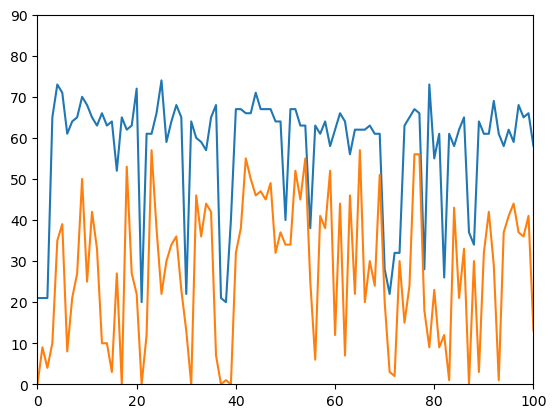

In [20]:
plt.plot(discarded_sequence["Score"])
plt.plot(discarded_sequence["Start"])
plt.xlim(0, 100)
plt.ylim(0, 90)
plt.show()

## Revert to discarded branches with linear weight

Command to run 100,000 games (ca. 1 minute run time):

```dotnet run --project MorpionSolitaireCLI -- -n 100000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\discardedLinearWeight" --maxHistogram --revertMode DiscardedBranch --weightPower 1 --weightOffset 0.5```

In [35]:
discardedLinearWeight_histogram = pd.read_csv("data/discardedLinearWeight/maxHistogram.csv", names=["Score", "Count"])
discardedLinearWeight_histogram["Count"].sum()

100000

In [36]:
discardedLinearWeight_histogram["Frequency"] = discardedLinearWeight_histogram["Count"] / discardedLinearWeight_histogram["Count"].sum()

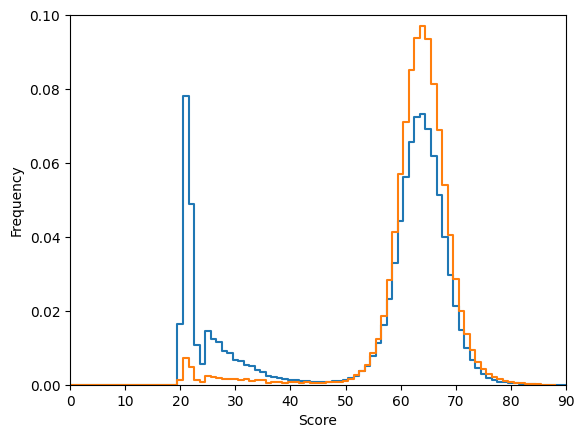

In [39]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(discardedLinearWeight_histogram["Score"], discardedLinearWeight_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

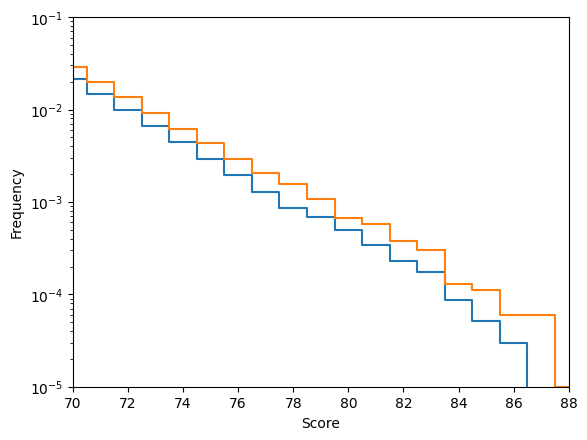

In [44]:
xmin, xmax = 70, 88
basic_histogram_tail = basic_histogram[xmin:xmax+1]
discardedLinearWeight_histogram_tail = discardedLinearWeight_histogram[xmin:xmax+1]
plt.step(basic_histogram_tail["Score"], basic_histogram_tail["Frequency"], where='mid')
plt.step(discardedLinearWeight_histogram_tail["Score"], discardedLinearWeight_histogram_tail["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(xmin, xmax)
plt.ylim(0.00001, 0.1)
plt.yscale('log')
plt.show()

## Revert to discarded branches with square weight

Command to run 100,000 games (ca. 1 minute run time):

```dotnet run --project MorpionSolitaireCLI -- -n 100000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\discardedSquareWeight" --maxHistogram --revertMode DiscardedBranch --weightPower 2 --weightOffset 33```

In [37]:
discardedSquareWeight_histogram = pd.read_csv("data/discardedSquareWeight/maxHistogram.csv", names=["Score", "Count"])
discardedSquareWeight_histogram["Count"].sum()

100000

In [38]:
discardedSquareWeight_histogram["Frequency"] = discardedSquareWeight_histogram["Count"] / discardedSquareWeight_histogram["Count"].sum()

In [43]:
discardedSquareWeight_histogram

,Score,Count,Frequency
0,0,0,0.00000
1,1,0,0.00000
2,2,0,0.00000
3,3,0,0.00000
4,4,0,0.00000
...,...,...,...
87,87,2,0.00002
88,88,1,0.00001
89,89,1,0.00001
90,90,0,0.00000


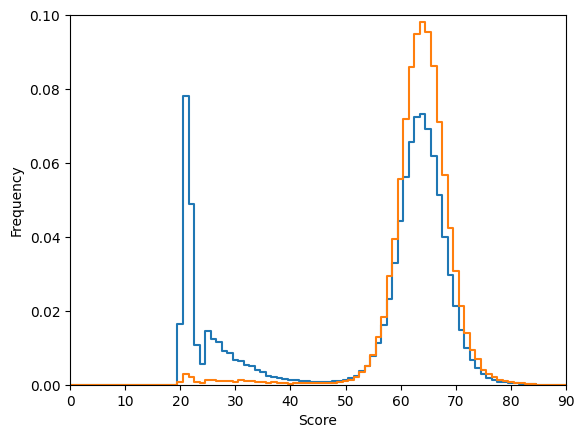

In [40]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(discardedSquareWeight_histogram["Score"], discardedSquareWeight_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

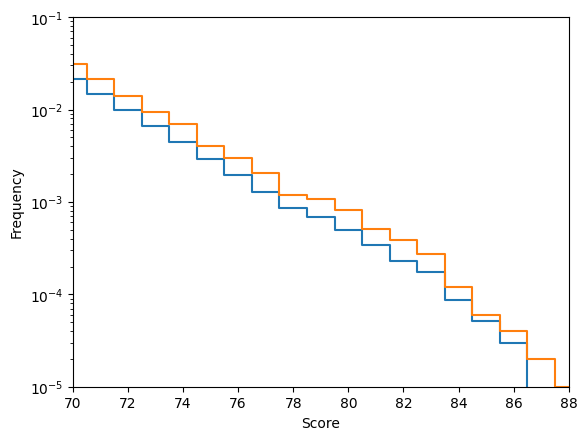

In [45]:
xmin, xmax = 70, 88
basic_histogram_tail = basic_histogram[xmin:xmax+1]
discardedSquareWeight_histogram_tail = discardedSquareWeight_histogram[xmin:xmax+1]
plt.step(basic_histogram_tail["Score"], basic_histogram_tail["Frequency"], where='mid')
plt.step(discardedSquareWeight_histogram_tail["Score"], discardedSquareWeight_histogram_tail["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(xmin, xmax)
plt.ylim(0.00001, 0.1)
plt.yscale('log')
plt.show()

## Systematic exploration

In [21]:
next_sequence = pd.read_csv("data/nextBranch/sequence.csv", names=["Start", "Score"])

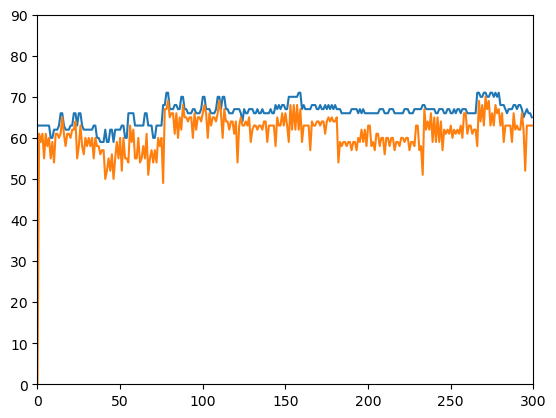

In [24]:
plt.plot(next_sequence["Score"])
plt.plot(next_sequence["Start"])
plt.xlim(0, 300)
plt.ylim(0, 90)
plt.show()